### Assignment - Advanced Regression

Importing basic libraries. Other specific libraries are imported as and when required

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Reading the data file

In [344]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Checking the shape of the dataframe

In [345]:
df.shape

(1460, 81)

checking the data types and values using info()

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Data Cleaning

Null values are present. Listing features having null values.

In [347]:
#Counting number of features with null values and without null values
print(f"No. of features with null values: {(df.isnull().sum() > 0).sum()}")
print(f"No. of features without null values: {(df.isnull().sum() == 0).sum()}")

No. of features with null values: 19
No. of features without null values: 62


In [348]:
dic = dict(df.isnull().sum() != 0)
lis_key = []
for key, value in dic.items():
    if value == True:
        lis_key.append(key)
dic1 = {}
for i in lis_key:
    dic1[i] = df[i].isnull().sum()

dic1



{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 872,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

There are 7 nos features with significant number of null values. (1) Alley with 1369, (2) PoolQC with 1453, (3) Fence with 1179, (4) MiscFeature with 1406, (5) MasVnrType with 872, (6) FireplaceQu with 690 and (7) LotFrontage with 259. These number of rows if deleted wont leave enough datapoints to build a model. The least number of null values in the above is for LotFrontage with 259 null values which is ~18% of total datapoints which is not a small number.

Therefore these 7 features are removed from the database since model cannot predict correctly the influence of these features. 

In [349]:
#Dropping 7 nos features with significant number of null values
df = df.drop(columns=['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 0)
df.shape

(1460, 74)

Dropping the column 'Id' since there is not contribution of the column to the model.

In [350]:
#Dropping column 'Id' which is irrelevant
df = df.drop(columns = ['Id'])
df.head()


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [351]:
df.shape

(1460, 73)

The new shape of dataframe is 1460,73 (previously 1460,81) after dropping 8 nos columns mentioned above

Checking for null values again

In [352]:
(df.isnull().sum() != 0).sum()

12

In [353]:
dic = dict(df.isnull().sum() != 0)
lis_key = []
for key, value in dic.items():
    if value == True:
        lis_key.append(key)
dic1 = {}
for i in lis_key:
    dic1[i] = df[i].isnull().sum()

dic1


{'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81}

There are 12 columns with null values still, it is better to drop rows with null values.

In [354]:
#dropping rows with null values
df = df.dropna()
df.shape

(1338, 73)

For the remaining features with lesser null values, those rows are removed. the new shape is 1338, 73. 122 rows are removed which is just 8% of the total number of datapoints. Still 1338 is a good number of datapoints

In [355]:
(df.isnull().sum() != 0).sum()

0

Now, there are no null values in the new dataframe

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotArea        1338 non-null   int64  
 3   Street         1338 non-null   object 
 4   LotShape       1338 non-null   object 
 5   LandContour    1338 non-null   object 
 6   Utilities      1338 non-null   object 
 7   LotConfig      1338 non-null   object 
 8   LandSlope      1338 non-null   object 
 9   Neighborhood   1338 non-null   object 
 10  Condition1     1338 non-null   object 
 11  Condition2     1338 non-null   object 
 12  BldgType       1338 non-null   object 
 13  HouseStyle     1338 non-null   object 
 14  OverallQual    1338 non-null   int64  
 15  OverallCond    1338 non-null   int64  
 16  YearBuilt      1338 non-null   int64  
 17  YearRemodAdd   1338 non-null   int64  
 18  RoofStyle    

Lists of categorical variables and numerical variables are prepared based on the data analysis<br>List of categorical variables (32 nos, after removing null values during data cleaning)<br>
List of numerical variables (41 nos after removing null values during data cleaning)

In [357]:
#List of categorical variables after removing null values
cat_list = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',  'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'SaleType','SaleCondition','KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'Heating']
#List of numerical variables after removing null values
num_list = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF', 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold','SalePrice' ]
print(len(num_list))
print(len(cat_list))

32
41


#### Handling outliers

In [358]:
df[num_list].describe()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000
mean,10706.294469,1973.029148,1985.668909,110.360239,464.234679,49.218236,582.494768,1095.947683,1176.221973,357.141256,...,501.449925,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,2007.805680,186761.782511
std,10336.621126,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,405.554435,386.644986,440.324982,...,186.761863,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,1.330691,78913.847668
min,1300.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,...,160.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2006.000000,35311.000000
25%,7744.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,819.750000,894.000000,0.000000,...,377.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2007.000000,135000.000000
50%,9600.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,489.000000,1021.500000,1098.000000,0.000000,...,484.000000,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2008.000000,168500.000000
75%,11760.750000,2001.000000,2004.000000,174.000000,733.000000,0.000000,815.750000,1324.000000,1414.000000,740.500000,...,583.000000,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2009.000000,220000.000000
max,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,2010.000000,755000.000000


In [359]:
#Copying the existing dataframe to a new dataframe which is a dataframe after handling outliers
df_clean = df

#### Plotting box plots of numerical variables, removing outliers and replotting the boxplot as a check.<br> This is done for all numerical variables<br> Outliers are not removed in cases where there are no significant numbers

<AxesSubplot:ylabel='LotArea'>

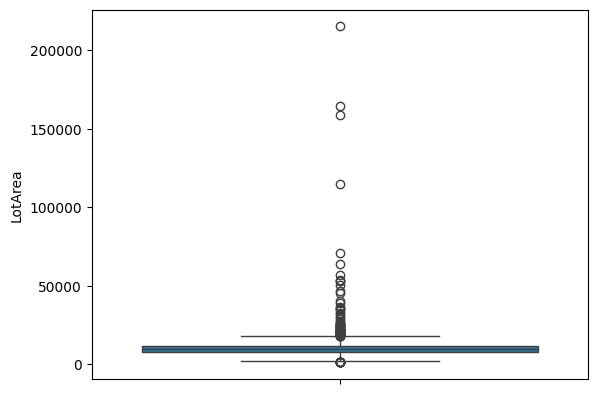

In [360]:
sns.boxplot(df['LotArea'])

<AxesSubplot:ylabel='LotArea'>

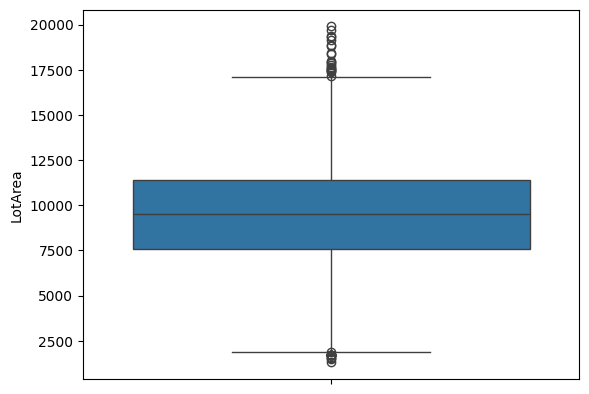

In [361]:
df_clean = df_clean.loc[df_clean['LotArea'] <= 20000]  
sns.boxplot(df_clean['LotArea'])

<AxesSubplot:ylabel='MasVnrArea'>

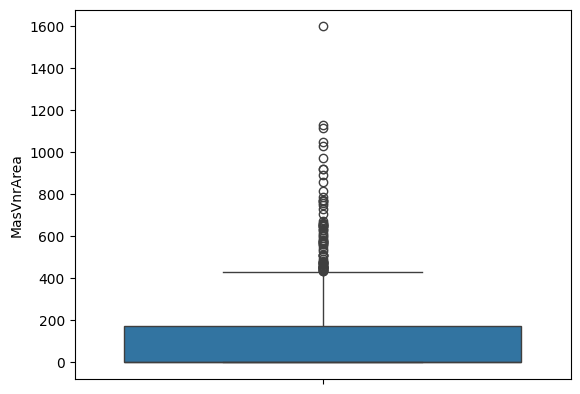

In [362]:
sns.boxplot(df_clean['MasVnrArea'])

<AxesSubplot:ylabel='MasVnrArea'>

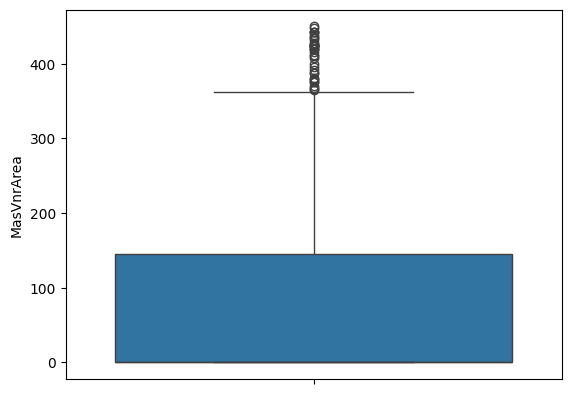

In [363]:
df_clean = df_clean.loc[df_clean['MasVnrArea'] <= 450]  
sns.boxplot(df_clean['MasVnrArea'])

<AxesSubplot:ylabel='BsmtFinSF1'>

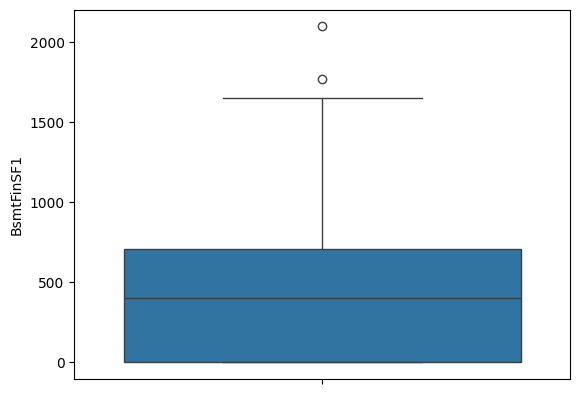

In [364]:
sns.boxplot(df_clean['BsmtFinSF1'])

<AxesSubplot:ylabel='BsmtFinSF2'>

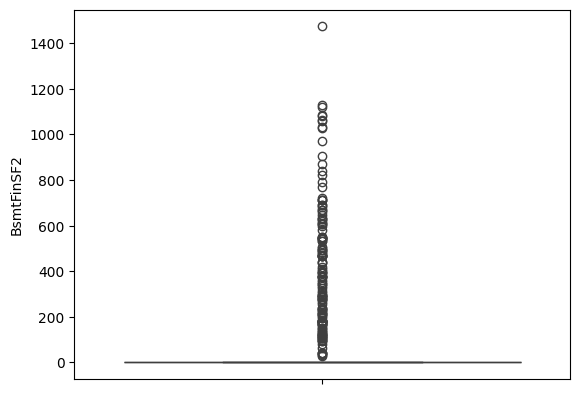

In [365]:
sns.boxplot(df_clean['BsmtFinSF2'])

<AxesSubplot:ylabel='BsmtFinSF2'>

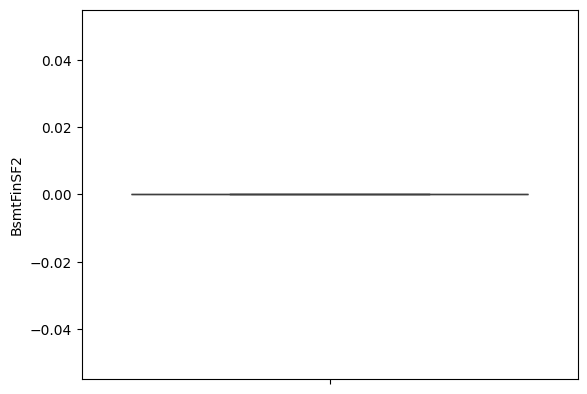

In [366]:
df_clean = df_clean.loc[df_clean['BsmtFinSF2'] <= 20]  
sns.boxplot(df_clean['BsmtFinSF2'])

<AxesSubplot:ylabel='BsmtUnfSF'>

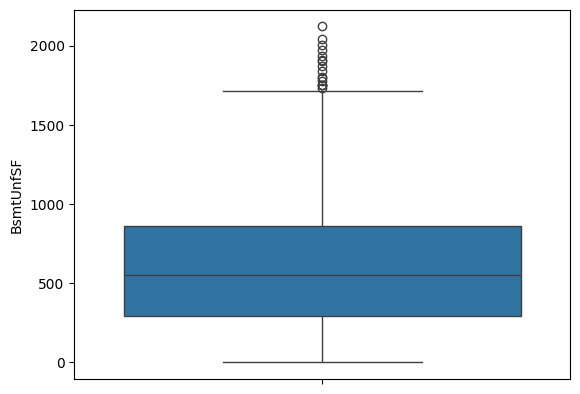

In [367]:
sns.boxplot(df_clean['BsmtUnfSF'])

<AxesSubplot:ylabel='BsmtUnfSF'>

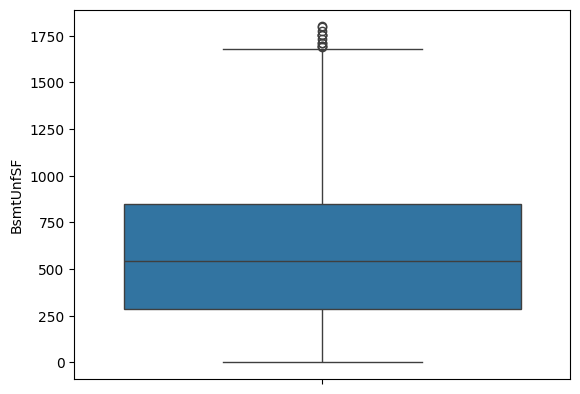

In [368]:
df_clean = df_clean.loc[df_clean['BsmtUnfSF'] <= 1800]  
sns.boxplot(df_clean['BsmtUnfSF'])

<AxesSubplot:ylabel='TotalBsmtSF'>

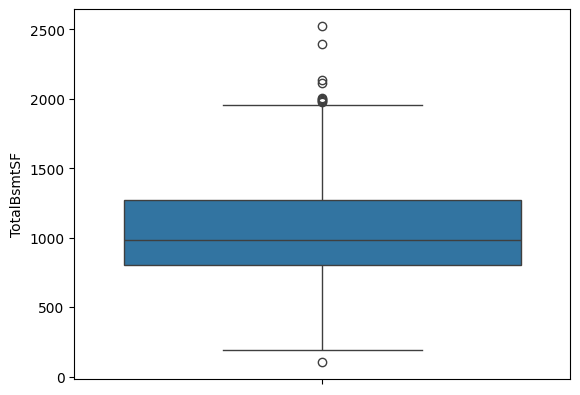

In [369]:
sns.boxplot(df_clean['TotalBsmtSF'])

<AxesSubplot:ylabel='1stFlrSF'>

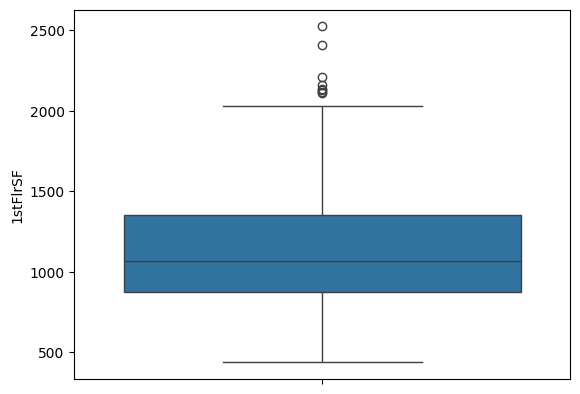

In [370]:
sns.boxplot(df_clean['1stFlrSF'])

<AxesSubplot:ylabel='2ndFlrSF'>

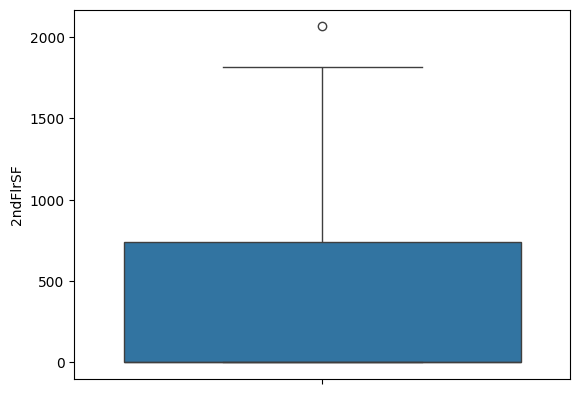

In [371]:

sns.boxplot(df_clean['2ndFlrSF'])

<AxesSubplot:ylabel='LowQualFinSF'>

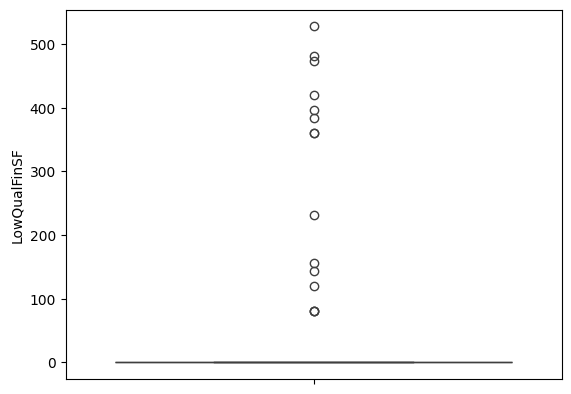

In [372]:

sns.boxplot(df_clean['LowQualFinSF'])

<AxesSubplot:ylabel='LowQualFinSF'>

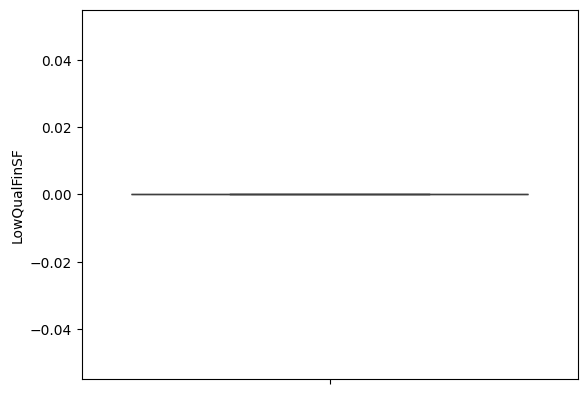

In [373]:
df_clean = df_clean.loc[df_clean['LowQualFinSF'] <= 20]  
sns.boxplot(df_clean['LowQualFinSF'])

<AxesSubplot:ylabel='GrLivArea'>

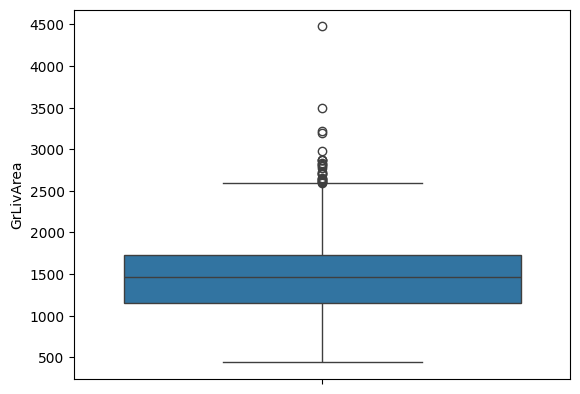

In [374]:
sns.boxplot(df_clean['GrLivArea'])

<AxesSubplot:ylabel='BsmtFullBath'>

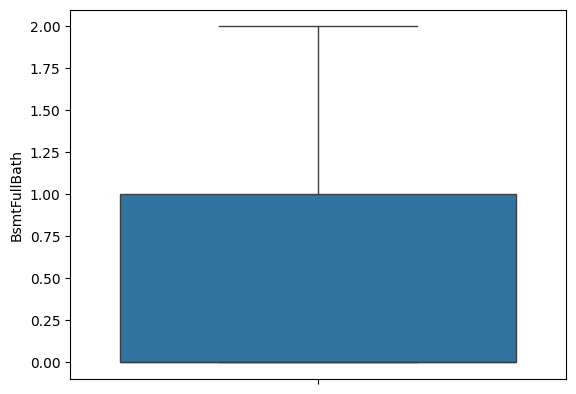

In [375]:

sns.boxplot(df_clean['BsmtFullBath'])

<AxesSubplot:ylabel='GarageArea'>

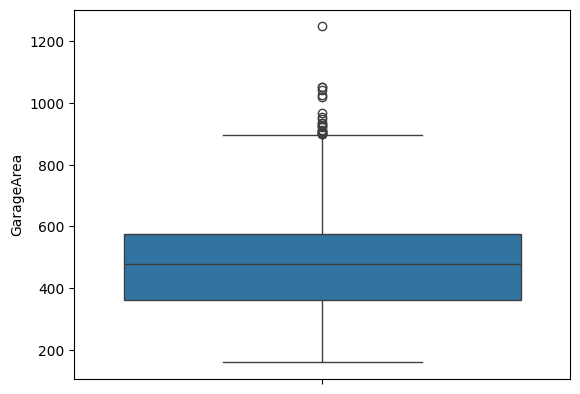

In [376]:
sns.boxplot(df_clean['GarageArea'])

<AxesSubplot:ylabel='WoodDeckSF'>

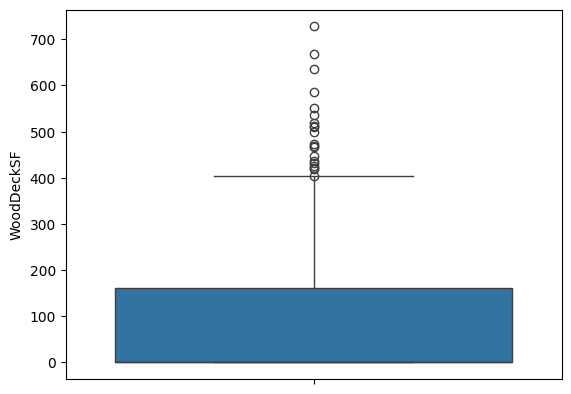

In [377]:
sns.boxplot(df_clean['WoodDeckSF'])

<AxesSubplot:ylabel='WoodDeckSF'>

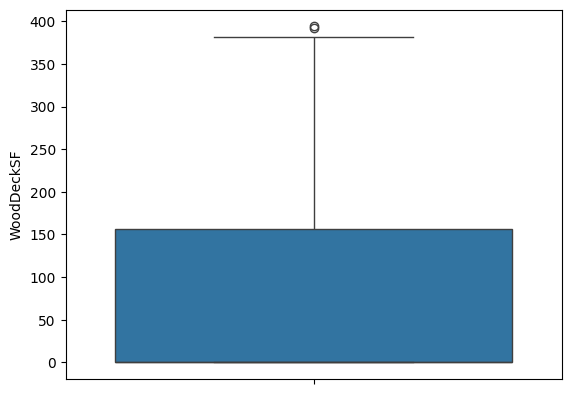

In [378]:
df_clean = df_clean.loc[df_clean['WoodDeckSF'] <= 400]  
sns.boxplot(df_clean['WoodDeckSF'])

<AxesSubplot:ylabel='OpenPorchSF'>

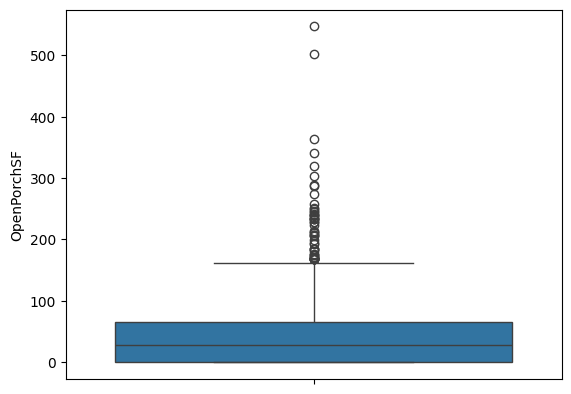

In [379]:
sns.boxplot(df_clean['OpenPorchSF'])

<AxesSubplot:ylabel='OpenPorchSF'>

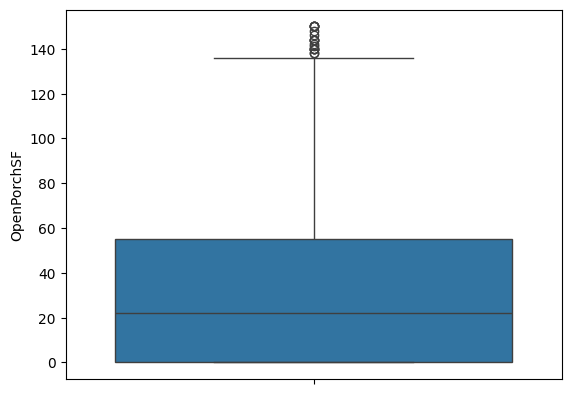

In [380]:
df_clean = df_clean.loc[df_clean['OpenPorchSF'] <= 150]  
sns.boxplot(df_clean['OpenPorchSF'])

<AxesSubplot:ylabel='PoolArea'>

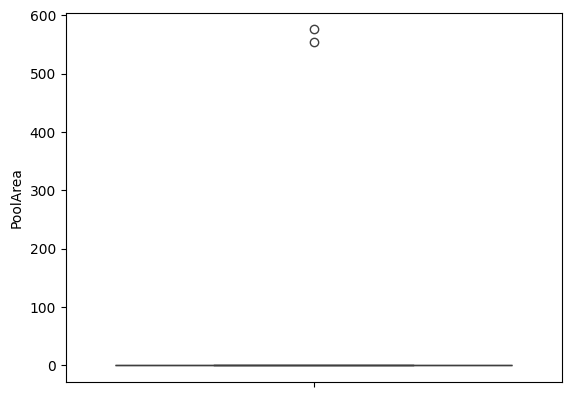

In [381]:
sns.boxplot(df_clean['PoolArea'])

<AxesSubplot:ylabel='PoolArea'>

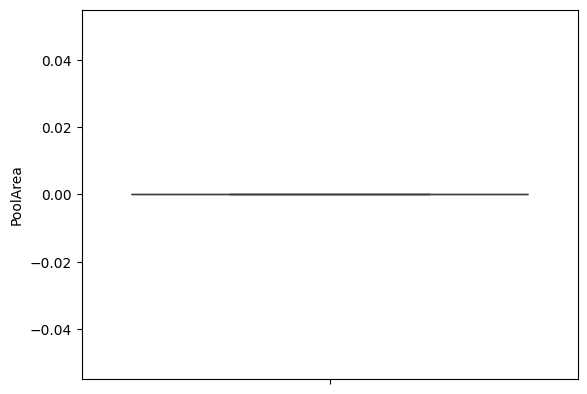

In [382]:
df_clean = df_clean.loc[df_clean['PoolArea'] <= 10]  
sns.boxplot(df_clean['PoolArea'])

<AxesSubplot:ylabel='MiscVal'>

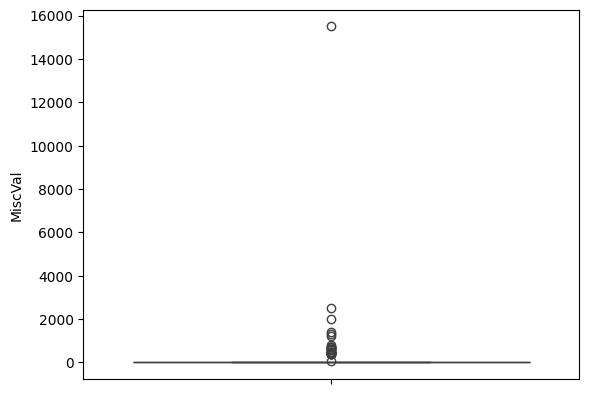

In [383]:
sns.boxplot(df_clean['MiscVal'])

<AxesSubplot:ylabel='MiscVal'>

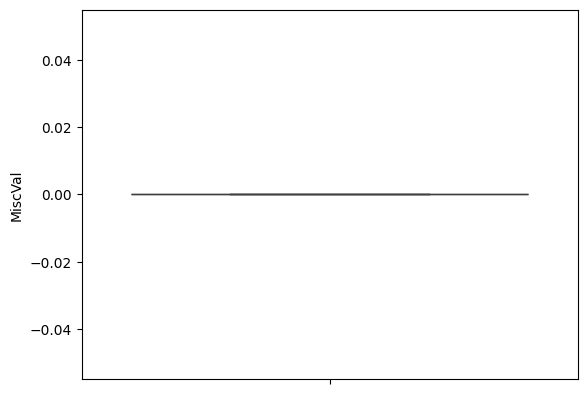

In [384]:
df_clean = df_clean.loc[df_clean['MiscVal'] <= 10]  
sns.boxplot(df_clean['MiscVal'])

CheckiChecking the original shape of the dataframe and after cleaning outliers

In [385]:
#Checking the original shape of the dataframe and after cleaning outliers
print(f"Original df shape: {df.shape}")
print(f"Cleaned df shape: {df_clean.shape}")

Original df shape: (1338, 73)
Cleaned df shape: (929, 73)


Still we have more than 900 datapoints which should be sufficient for model building

#### Converting categorical variables into dummy variables

In [386]:
#Convert categorical variables to dummy variables and concatenating the dummies to the original df to form a new dataframe df1
#Prefix is also added to dummy variables, if there are same values of categories for multiple varaibles

df1 = df_clean
for i in cat_list:
    dumm = pd.get_dummies(df1[i], prefix=i, dtype=int, drop_first=True)
    df1 = pd.concat([df1, dumm], axis = 1)
 
df1.head()


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Heating_GasW,Heating_Grav,Heating_OthW
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,0,0,0,0
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,1,0,0,0,0,0,0
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,0,1,0,0,0


Dropping the original variables after converting to dummies

In [387]:
df1 = df1.drop(columns=cat_list)
df1.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Heating_GasW,Heating_Grav,Heating_OthW
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,0,0,0,0,0,0
1,9600,1976,1976,0.0,978,0,284,1262,1262,0,...,0,0,0,0,0,0,0,0,0,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,1,0,0,0,0,0,0
3,9550,1915,1970,0.0,216,0,540,756,961,756,...,0,0,0,0,0,0,0,0,0,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,0,0,1,0,0,0


Test-train split using scikit learn library

In [388]:
# importing libraries for test-train split

import sklearn
from sklearn.model_selection import train_test_split

In [389]:
#Test train split of the new dataframe df1
df1_train, df1_test = train_test_split(df1, train_size=0.7, random_state = 100)

Checking datatypes of numerical variables

In [390]:
for i in num_list:
   print(df[i].dtype)

int64
int64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64


#### Scaling the numerical variables. This is requried since the scales of the variables are different and varying.

In [391]:
## Scaling numerical variables in training set. minMax Scaler is used since it seems to be apt.
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
scaler = MinMaxScaler()
df1_train[num_list] = scaler.fit_transform(df1_train[num_list])

df1_train.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Heating_GasW,Heating_Grav,Heating_OthW
834,0.345543,0.623077,0.183333,0.302222,0.347509,0.0,0.317778,0.496875,0.399096,0.000000,...,0,0,0,1,0,0,0,0,0,0
193,0.054207,0.953846,0.900000,0.111111,0.000000,0.0,0.538889,0.406250,0.300735,0.406491,...,0,0,0,0,0,0,0,0,0,0
689,0.329324,0.961538,0.933333,0.568889,0.012151,0.0,0.745556,0.610417,0.522329,0.000000,...,1,0,0,0,0,0,0,0,0,0
186,0.458311,0.846154,0.683333,0.000000,0.371203,0.0,0.320556,0.519792,0.440362,0.000000,...,1,0,0,0,0,0,0,0,0,0
822,0.591488,0.946154,0.883333,0.000000,0.000000,0.0,0.470556,0.342188,0.231204,0.487349,...,0,0,0,0,1,0,0,0,0,0


In [392]:
df1_train.describe()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Heating_GasW,Heating_Grav,Heating_OthW
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.0,650.000000,650.000000,650.000000,650.000000,...,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.0
mean,0.418134,0.724036,0.596846,0.178783,0.269729,0.0,0.343765,0.454558,0.394440,0.180789,...,0.164615,0.167692,0.069231,0.036923,0.061538,0.053846,0.041538,0.009231,0.003077,0.0
std,0.172626,0.230656,0.352056,0.263896,0.257139,0.0,0.236106,0.179723,0.188928,0.229340,...,0.371119,0.373881,0.254042,0.188718,0.240500,0.225888,0.199686,0.095706,0.055427,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.325133,0.576923,0.287500,0.000000,0.000000,0.0,0.156528,0.325651,0.248869,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.415315,0.738462,0.766667,0.000000,0.255468,0.0,0.304167,0.421094,0.358677,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.520205,0.946154,0.900000,0.328889,0.445170,0.0,0.479583,0.574219,0.520774,0.389714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


from the above, it can be seen that all the values are now between zero and one

#### Fitting a linear regression model

In [393]:
#Importing necessary library
from sklearn.linear_model import LinearRegression


In [394]:
#defining predictor and target variables in training data
y_train = df1_train.pop('SalePrice') # prediction requried
X_train = df1_train # predictor variables

In [395]:
lm = LinearRegression()

In [396]:
lm.fit(X_train, y_train)


LinearRegression()

In [397]:
#Predciting y values from X_train
y_pred_train = lm.predict(X_train)

In [398]:
#Residuals from y_train
residuals = y_pred_train - y_train

<AxesSubplot:ylabel='SalePrice'>

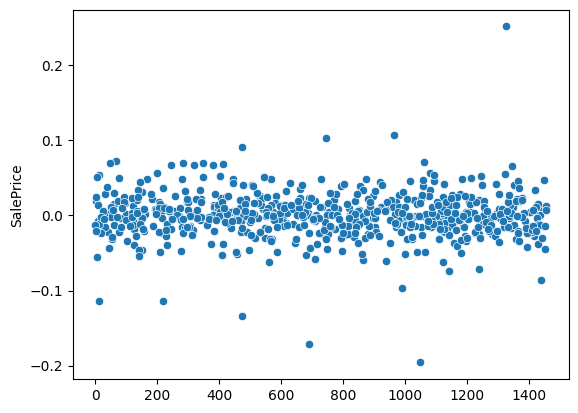

In [399]:
#Plotting scatter plot of residuals
sns.scatterplot(residuals)

<AxesSubplot:ylabel='SalePrice'>

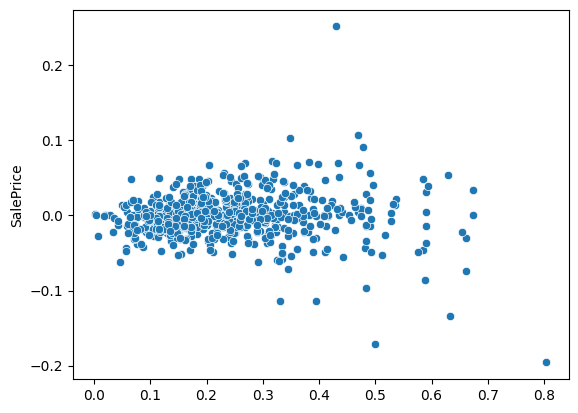

In [400]:
#Scatter plot of residuals vs predictions in training data set
sns.scatterplot(x=y_pred_train, y=residuals)
    

#### Linear Model evaluation

In [401]:
#Importing necessary libraries
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [402]:
#FInding r2 score from y_train
r2_score_LR_train = r2_score(y_true = y_train, y_pred = y_pred_train)
r2_score_LR_train

0.9461732854639885

performing same min-max scaling transformation on test data as done on training data

In [403]:
df1_test[num_list] = scaler.transform(df1_test[num_list])

df1_test.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Heating_GasW,Heating_Grav,Heating_OthW
593,0.158322,0.946154,0.883333,0.377778,0.416160,0.0,0.090556,0.342708,0.231769,0.000000,...,0,0,0,0,0,0,0,0,0,0
202,0.297921,0.338462,0.000000,0.000000,0.374848,0.0,0.000000,0.222396,0.241379,0.244774,...,0,0,0,0,0,0,0,0,0,0
476,0.631272,0.900000,0.800000,0.477778,0.603888,0.0,0.268889,0.670833,0.596382,0.000000,...,0,0,0,0,0,0,0,0,0,0
225,0.008381,0.700000,0.350000,0.315556,0.000000,0.0,0.350000,0.229167,0.108536,0.369637,...,0,0,0,0,0,0,0,0,0,0
1172,0.135572,0.969231,0.950000,0.000000,0.000000,0.0,0.347222,0.226562,0.105709,0.343784,...,0,0,0,0,0,0,0,0,0,0


In [404]:
df1_test.describe()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Heating_GasW,Heating_Grav,Heating_OthW
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.0,279.000000,279.000000,279.000000,279.000000,...,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,0.408632,0.707168,0.609438,0.180112,0.260225,0.0,0.326213,0.429954,0.373639,0.206714,...,0.182796,0.150538,0.111111,0.050179,0.064516,0.046595,0.039427,0.010753,0.003584,0.003584
std,0.179258,0.242948,0.339618,0.251970,0.254030,0.0,0.206967,0.169612,0.183627,0.224850,...,0.387193,0.358240,0.314834,0.218707,0.246112,0.211148,0.194957,0.103321,0.059868,0.059868
min,-0.012300,0.076923,0.000000,0.000000,0.000000,0.0,0.000000,-0.044271,0.023742,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.298411,0.534615,0.333333,0.000000,0.000000,0.0,0.163056,0.309375,0.232052,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.409056,0.738462,0.766667,0.000000,0.229648,0.0,0.302778,0.388542,0.332391,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.524872,0.938462,0.900000,0.347778,0.432868,0.0,0.445000,0.544010,0.495195,0.410341,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.940133,0.992308,1.000000,0.966667,0.983597,0.0,0.950000,1.013542,0.972301,0.726073,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [405]:
#defining predictor and target variables in test data
y_test = df1_test.pop('SalePrice') # prediction requried
X_test = df1_test # predictor variables

In [406]:
#y test predicted using Linear Model
y_pred_test = lm.predict(X_test)

In [407]:
#Residuals from y_test predicted
residuals_test = y_pred_test - y_test

<AxesSubplot:ylabel='SalePrice'>

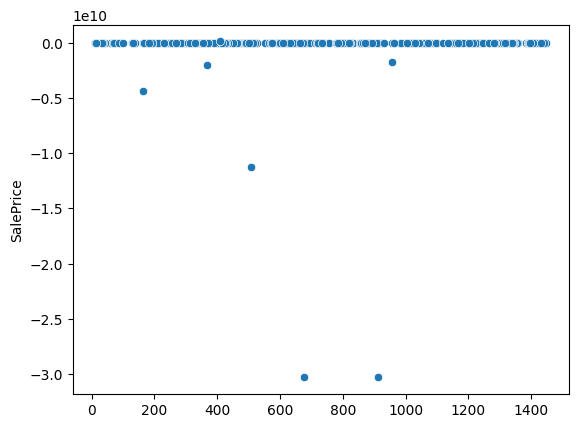

In [408]:
#Scatter plot of residuals of y_test
sns.scatterplot(residuals_test)

#### The Linear model is no good than a horizontal line!!!!

<AxesSubplot:ylabel='SalePrice'>

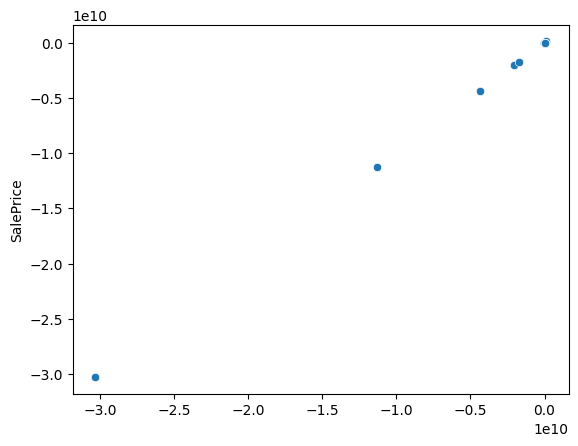

In [409]:
#Scatter plot of residuals vs predictions in test data set
sns.scatterplot(x=y_pred_test, y=residuals_test)
    

#### No specific patterns could be observed the residuals plots which calls for polynomial regression fits. Therefore polynomial regression exercise is considered futile

In [410]:
#r2 score from y_test predicted
r2_score_LR_test = r2_score(y_true = y_test, y_pred = y_pred_test)
r2_score_LR_test

-4.5072856987609294e+20

Other metrics

In [411]:
mse_train_LR = mean_squared_error(y_true = y_train, y_pred = y_pred_train)
mse_test_LR = mean_squared_error(y_true = y_test, y_pred = y_pred_test)
mae_train_LR = mean_absolute_error(y_true = y_train, y_pred = y_pred_train)
mae_test_LR = mean_absolute_error(y_true = y_test, y_pred = y_pred_test)

print(f"r2 for train data(LR): {r2_score_LR_train}")
print(f"r2 for test data(LR): {r2_score_LR_test}")
print(f"mse for train data(LR): {mse_train_LR}")
print(f"mse for test data(LR): {mse_test_LR}")
print(f"mae for train data(LR): {mae_train_LR}")
print(f"mae for test data(LR): {mae_test_LR}")

r2 for train data(LR): 0.9461732854639885
r2 for test data(LR): -4.5072856987609294e+20
mse for train data(LR): 0.0009298275025130358
mse for test data(LR): 7.132205105060337e+18
mae for train data(LR): 0.020390898852724756
mae for test data(LR): 287334612.5240714


r2 score on predictions is negative...something wrong with the model. Mostly overfitting<br>r2 score of training data set is well above that of test data set. <br> There is good scope for regularization.

#### Regularization Steps

In [412]:
#importing ridge and lasso regularization functions from sklearn
from sklearn.linear_model import Ridge, Lasso
#importing gridsearchCV function for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

Trying out Ridge regularization function and finding our best value of alpha(hyperparameter)

In [413]:
ridge = Ridge() # Invoking ridge function
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}#Defining a list of alpha paramteres
folds = 5 # defining number of folds for cross validation

#GridSearch algorithm
model_cv = GridSearchCV(
    estimator=ridge, 
    param_grid=params, 
    scoring='neg_mean_absolute_error', 
    cv=folds, 
    return_train_score=True, 
    verbose=1)

model_cv.fit(X_train, y_train)#Fitting the ridge linear model

print(model_cv.best_params_)#Printing the best parameter of alpha(hyperparameter)



Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 4.0}


In [414]:
#After finding the best value of alpha(hyperparameter), refitting the model with best value of alpha
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=4)

In [415]:
#predicting the variables using ridge model
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

Evaluation of ridge model

In [416]:
#Finding model metrics for ridge model
r2_train_ridge = r2_score(y_train, y_pred_train)
r2_test_ridge = r2_score(y_test, y_pred_test)
mse_train_ridge = mean_squared_error(y_train, y_pred_train)
mse_test_ridge = mean_squared_error(y_test, y_pred_test)
mae_train_ridge = mean_absolute_error(y_train, y_pred_train)
mae_test_ridge = mean_absolute_error(y_test, y_pred_test)

residuals_ridge = y_pred_test - y_test

print(f"r2 for train data(ridge): {r2_train_ridge}")
print(f"r2 for test data(ridge): {r2_test_ridge}")
print(f"mse for train data(ridge): {mse_train_ridge}")
print(f"mse for test data(ridge): {mse_test_ridge}")
print(f"mae for train data(ridge): {mae_train_ridge}")
print(f"mae for test data(ridge): {mae_test_ridge}")

r2 for train data(ridge): 0.9336542757792746
r2 for test data(ridge): 0.8964754426058412
mse for train data(ridge): 0.001146086652071313
mse for test data(ridge): 0.0016381441650097934
mae for train data(ridge): 0.02276288747859135
mae for test data(ridge): 0.028542940506995716


From the above it can be seen that the r2 score of the train and test data are very close, implying a good optimally fit model. The values when compared with a linear model without regularization are much better and trustworthy<br>Other metrics are also comparable

<AxesSubplot:ylabel='SalePrice'>

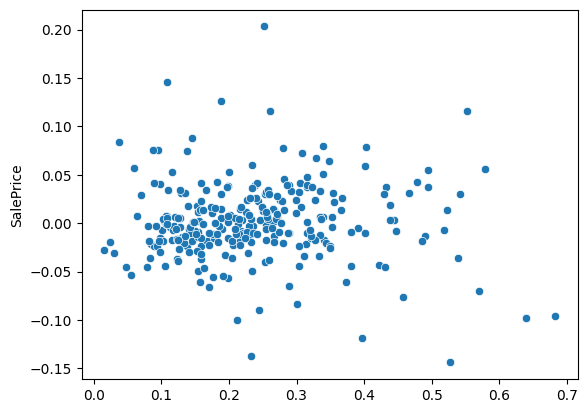

In [417]:
#Scatter plot of residuals vs predictions
sns.scatterplot(y=residuals_ridge, x=y_pred_test)

The plot shows no specific pattern and the mean is around zero

Trying out Lasso regularization function and finding our best value of alpha(hyperparameter)

In [418]:
lasso = Lasso()#Invoking Lasso function

params = {'alpha':[0.00001, 0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}#Defining a list of alpha paramteres
folds = 5 # defining number of folds for cross validation

#grid search algorithm
model_cv = GridSearchCV(
    estimator=lasso, 
    param_grid=params, 
    scoring='neg_mean_absolute_error', 
    cv=folds, 
    return_train_score=True, 
    verbose=1)

#Fitting the lasso regression model
model_cv.fit(X_train, y_train)
#Printing the best value of alpha(hyper parameter from lasso model)
print(model_cv.best_params_)


Fitting 5 folds for each of 33 candidates, totalling 165 fits
{'alpha': 0.0002}


In [419]:
#After finding the best value of alpha(hyperparameter), refitting the model with best value of alpha
alpha = 0.0002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

#Predictions using lasso model
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)


Evaluating the lasso model

In [420]:

#residuals 
residuals_lasso = y_pred_test - y_test

#Evaluation metrics for lasso model
r2_train_lasso = r2_score(y_train, y_pred_train)
r2_test_lasso = r2_score(y_test, y_pred_test)
mse_train_lasso = mean_squared_error(y_train, y_pred_train)
mse_test_lasso = mean_squared_error(y_test, y_pred_test)
mae_train_lasso = mean_absolute_error(y_train, y_pred_train)
mae_test_lasso = mean_absolute_error(y_test, y_pred_test)


print(f"r2 for train data(lasso): {r2_train_lasso}")
print(f"r2 for test data(lasso): {r2_test_lasso}")
print(f"mse for train data(lasso): {mse_train_lasso}")
print(f"mse for test data(lasso): {mse_test_lasso}")
print(f"mae for train data(lasso): {mae_train_lasso}")
print(f"mae for test data(lasso): {mae_test_lasso}")

r2 for train data(lasso): 0.9281459246348163
r2 for test data(lasso): 0.8954619362667169
mse for train data(lasso): 0.001241240451291028
mse for test data(lasso): 0.001654181610978442
mae for train data(lasso): 0.02372001174404411
mae for test data(lasso): 0.0287456857020155


From the above it can be seen that the r2 score of the train and test data are very close, implying a good optimally fit model. The values when compared with a linear model without regularization are much better and trustworthy<br>Other metrics are also comparable

<AxesSubplot:ylabel='SalePrice'>

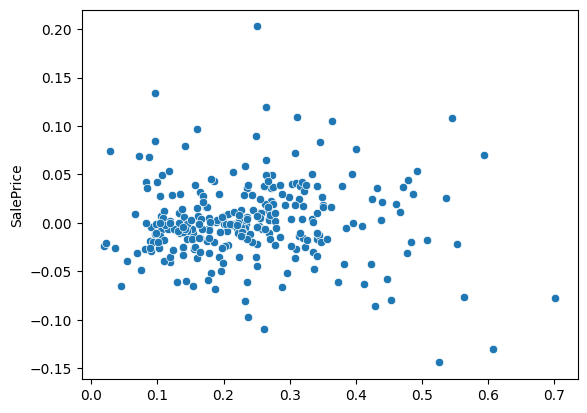

In [421]:
#Scatter plot of reiduals vs predictions in case of lasso
sns.scatterplot(y=residuals_lasso, x=y_pred_test)

The plot shows no specific pattern and is centered around mean  = zero

##### Plots of residuals in case of ridge and lasso models

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

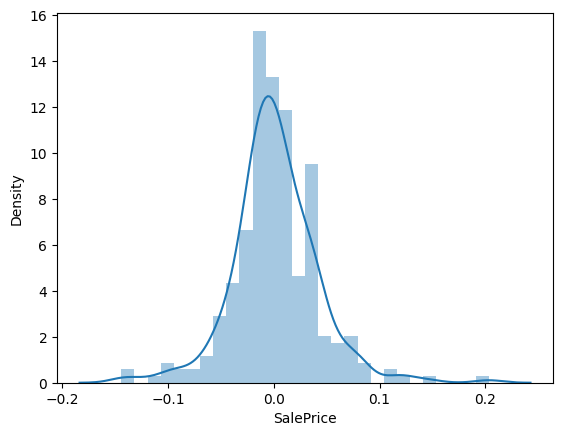

In [422]:
sns.distplot(residuals_ridge)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

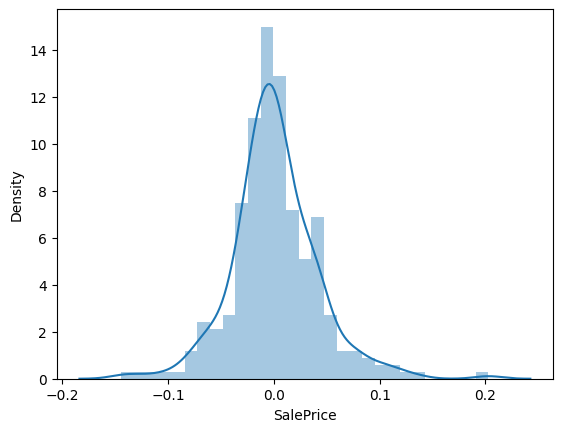

In [423]:

sns.distplot(residuals_lasso)


##### It can be seen from the above plots of residuals that both the ridge and lasso models are good since the distribution is normal, no skews and centered around zero.

#### Finding most influential variables by arranging the variables in the order of coefficients

In [424]:
#Finding influential variables in case of lasso
features_lasso = lasso.feature_names_in_
coeff_lasso = lasso.coef_
dic_lasso = dict(zip(features_lasso, coeff_lasso))
dic_lasso

{'LotArea': 0.029575543287358362,
 'YearBuilt': 0.04852158095629925,
 'YearRemodAdd': 0.02361832435313543,
 'MasVnrArea': 0.011011985046483352,
 'BsmtFinSF1': 0.0567622505967029,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.05121261745149894,
 '1stFlrSF': 0.03502509436939551,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': 0.0,
 'GrLivArea': 0.2937852315025598,
 'BsmtFullBath': -0.0052976018345492586,
 'BsmtHalfBath': -0.0,
 'FullBath': 0.0,
 'HalfBath': 0.000512198566926356,
 'BedroomAbvGr': -7.776034820424154e-05,
 'KitchenAbvGr': -0.046167126087777975,
 'TotRmsAbvGrd': 0.0,
 'Fireplaces': 0.01616840939831296,
 'GarageYrBlt': 0.006393326972634365,
 'GarageCars': 0.03299365078791652,
 'GarageArea': 0.026169241213424083,
 'WoodDeckSF': 0.006420012295643813,
 'OpenPorchSF': 0.011838655909717158,
 'EnclosedPorch': 0.0,
 '3SsnPorch': 0.0,
 'ScreenPorch': 0.003971100130783604,
 'PoolArea': 0.0,
 'MiscVal': 0.0,
 'YrSold': 0.0,
 'MSSubClass_30': -0.0025629115052860987,
 'MSSubClass_40': 0.0,

In [425]:
sorted_dict_lasso = dict(sorted(dic_lasso.items(), key=lambda item: item[1]))
sorted_dict_lasso

{'KitchenAbvGr': -0.046167126087777975,
 'Neighborhood_MeadowV': -0.026243531844477943,
 'BsmtQual_Gd': -0.022996743803220126,
 'Exterior2nd_Wd Shng': -0.022063627272248358,
 'OverallQual_4': -0.02179037586236031,
 'Neighborhood_Edwards': -0.02152320433297119,
 'OverallCond_4': -0.02150667050631841,
 'OverallCond_3': -0.02144217939944246,
 'OverallQual_5': -0.019043725946810038,
 'OverallQual_6': -0.01812940776725638,
 'BsmtQual_Fa': -0.0160031749047639,
 'BsmtQual_TA': -0.015968047683324427,
 'Neighborhood_NAmes': -0.015417791798089359,
 'MSSubClass_90': -0.013723217728104689,
 'OverallCond_5': -0.012839062940672453,
 'ExterQual_TA': -0.010662141881495259,
 'BldgType_TwnhsE': -0.010449220305319832,
 'BldgType_Twnhs': -0.010195981106108183,
 'Electrical_SBrkr': -0.00974490732877466,
 'Exterior2nd_HdBoard': -0.008122721911404776,
 'MoSold_2': -0.007933855547294482,
 'KitchenQual_Gd': -0.006852873678616566,
 'HeatingQC_TA': -0.006452843735002367,
 'KitchenQual_Fa': -0.006442916713630664,

Most influential varaibles in lasso model are the below, given together with the coefficient values:<br><br>
'TotalBsmtSF': 0.05121261745149894,<br>
'BsmtFinSF1': 0.0567622505967029,<br>
'Neighborhood_StoneBr': 0.08124034206382509,<br>
'OverallQual_9': 0.09743914277586685,<br>
'GrLivArea': 0.2937852315025598

In [426]:
#FInding influential variables in case of ridge
features_ridge = ridge.feature_names_in_
coeff_ridge = ridge.coef_
dic_ridge = dict(zip(features_ridge, coeff_ridge))
dic_ridge

{'LotArea': 0.038557825748434464,
 'YearBuilt': 0.02901506547732977,
 'YearRemodAdd': 0.023116877486865854,
 'MasVnrArea': 0.016438558086668435,
 'BsmtFinSF1': 0.061195204562296934,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 0.007496243754295226,
 'TotalBsmtSF': 0.05948986743087073,
 '1stFlrSF': 0.08110759807099444,
 '2ndFlrSF': 0.0504316096289735,
 'LowQualFinSF': 0.0,
 'GrLivArea': 0.07697676179805613,
 'BsmtFullBath': -0.008660024617992592,
 'BsmtHalfBath': -0.005960121015772016,
 'FullBath': 0.02370818431278918,
 'HalfBath': 0.0115300905996365,
 'BedroomAbvGr': -0.012067517107778215,
 'KitchenAbvGr': -0.020416265970478607,
 'TotRmsAbvGrd': 0.03119248163481293,
 'Fireplaces': 0.021749285666359246,
 'GarageYrBlt': 0.009318924471687858,
 'GarageCars': 0.03217693461881481,
 'GarageArea': 0.03335316186558291,
 'WoodDeckSF': 0.007340804149720635,
 'OpenPorchSF': 0.014174154775803076,
 'EnclosedPorch': 0.006219168558357949,
 '3SsnPorch': 0.009794959984457695,
 'ScreenPorch': 0.01097470556384785,
 

In [427]:
sorted_dict_ridge = dict(sorted(dic_ridge.items(), key=lambda item: item[1]))
sorted_dict_ridge

{'Neighborhood_MeadowV': -0.03226469807679569,
 'OverallQual_4': -0.03072371601132878,
 'Neighborhood_Edwards': -0.02854721275358869,
 'OverallQual_5': -0.027776109912092454,
 'BsmtQual_Gd': -0.027337005002531556,
 'OverallQual_6': -0.026175643010253588,
 'BsmtQual_Fa': -0.0252987512410145,
 'Neighborhood_NAmes': -0.025168276224289046,
 'BsmtQual_TA': -0.023379944883840337,
 'OverallCond_3': -0.02293746685602062,
 'Functional_Mod': -0.022142718140352454,
 'Exterior2nd_Wd Shng': -0.022020384240152024,
 'KitchenAbvGr': -0.020416265970478607,
 'KitchenQual_Fa': -0.020336008397593384,
 'KitchenQual_Gd': -0.019379261460895726,
 'KitchenQual_TA': -0.01903803095262874,
 'OverallCond_4': -0.018227274070805922,
 'ExterQual_TA': -0.016544905008348633,
 'OverallQual_3': -0.016243503355960337,
 'LandSlope_Sev': -0.016236305425034223,
 'MSSubClass_90': -0.015346112233112429,
 'BldgType_Duplex': -0.015346112233112406,
 'Neighborhood_Mitchel': -0.015312885036446145,
 'BldgType_Twnhs': -0.014360636288

Most influential varaibles in ridge model are the below, given together with the coefficient values:<br><br>
'BsmtFinSF1': 0.061195204562296934,<br>
 'Neighborhood_StoneBr': 0.06333384093064026,<br>
 'OverallQual_9': 0.064576906130004,<br>
 'GrLivArea': 0.07697676179805613,<br>
 '1stFlrSF': 0.08110759807099444

#### Summary:<br><br>  Comparison of r2 scores and other metrics

In [428]:
metrics = {'Metric':['r2 score', 'MSE', 'MAE'],
           'Linear Regression Training data':[r2_score_LR_train, mse_train_LR, mae_train_LR],
           'Linear Regression Test data': [r2_score_LR_test, mse_test_LR, mae_train_LR],
           'Ridge Regression Training data': [r2_train_ridge, mse_train_ridge, mae_train_ridge],
           'Ridge Regression Test data': [r2_test_ridge, mse_test_ridge, mae_test_ridge],
           'Lasso Regression Training data': [r2_train_lasso, mse_train_lasso, mae_train_lasso],
           'Lasso Regression Test data': [r2_test_lasso, mse_test_lasso, mae_test_lasso]
           }
metrics_comp = pd.DataFrame(metrics)
metrics_comp

,Metric,Linear Regression Training data,Linear Regression Test data,Ridge Regression Training data,Ridge Regression Test data,Lasso Regression Training data,Lasso Regression Test data
0,r2 score,0.946173,-4.507286e+20,0.933654,0.896475,0.928146,0.895462
1,MSE,0.000930,7.132205e+18,0.001146,0.001638,0.001241,0.001654
2,MAE,0.020391,2.039090e-02,0.022763,0.028543,0.023720,0.028746


#### Checking the number of coefficients in Ridge and Lasso models

In [429]:
#Printing the total number of coefficients in the models
print(len(lasso.coef_))
print(len(ridge.coef_))

237
237


In [430]:
#Checking the number of coefficients reduced to zero by lasso model
j = 0
for i in lasso.coef_:
    if i == 0:
        j = j+1

print(f"No of coefficients reduced to zero in Lasso model: {j}")

No of coefficients reduced to zero in Lasso model: 135


In [431]:
#Checking the number of coefficients reduced to zero by ridge model
j = 0
for i in ridge.coef_:
    if i == 0:
        j = j+1

print(f"No of coefficients reduced to zero in Ridge model: {j}")

No of coefficients reduced to zero in Ridge model: 11


### Conclusions:<br>
- It can be seen that r2 score and other metrics of test and train data in case of linear regression model is not at all comparable hinting at overfitting.<br>
- Both Ridge and Lasso models yielded comparable metric values for r2 score and other metrics for training and test data. This implies a better well fit trustworthy model.<br>
- Though values of metrics of Ridge and Lasso are comparable, Ridge model is marginally better since the r2 scores are better for Ridge model as can be seen from the above table.<br>
- 4 nos features are commonly found to be having high influence in both ridge and lasso models, those are<br><br>
    - 'BsmtFinSF1',<br>
    - 'Neighborhood_StoneBr',<br>
    - 'OverallQual_9',<br>
    - 'GrLivArea'<br>
- Considering model simplicity LASSO is the preferred one, explanation is given below.<br>
	It has reduced the coefficients of 135 nos of variables to zero. Lasso regression model	inherently is a feature selection model when compared to ridge model. In this specific case of 	assignment, ridge model reduces the number of features only by 11, in comparison to lasso 	where 135 nos were reduced.
    
    - Total number of non-zero feature coefficients in Lasso model: 237 – 135 = 102 features<br>
    - Total number of non-zero feature coefficients in Ridge model: 237 – 11 = 126 features<br>
- Looking at the complexity of the models, lasso model is much simpler, and has comparable 	metrics too. The Lasso model with the chosen variables describes almost 89.5% of the predictions which is a good score.<br>
So, giving an upper hand to simpler models and also considering the metrics, LASSO model is the preferred on this use case.
- The five most influential variables from the Lasso model are given below.
    - TotalBsmtSF
    - BsmtFinSF1
    - Neighborhood_StoneBr
    - OverallQual_9
    - GrLivArea

